## 직무 추천 알고리즘

> 코드 개요

이력서와 직무 정보 간의 유사도를 측정하여 상위 n개의 직무 추천

> 순서

이력서 데이터 구성
- 이력서의 주요 정보를 하나의 텍스트로 통합

직무 데이터 로드 및 전처리
- 직무 정보에서 권장 교육 수준을 숫자로 매핑하고, 유사도 측정을 위헤 텍스트 정리

적합도 점수 계산
- 점수는 총 4가지 요소로 구성하였으며 가중치는 현업 종사자에게 질문 및 서치를 통해 일정하게 배분

- 점수 요소

    1)자격증 매칭 점수

    2)경력 점수

    3)권장 교육 수준 점수

    4)TF-IDF와 BERT를 이용한 텍스트 유사도 점수

        단어의 빈도를 기반으로 비교하는 TF-IDF,  문장의 의미와 문맥을 파악하여 유사도를 계산하는 BERT를 함께 사용함으로써 정확도를 높이고자 하였음


## '이직희망자' 알고리즘 코드

In [2]:
pip install sentence-transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### '이직희망자' 예시 데이터

In [47]:
# 이력서 데이터
data = {
    "personal_info": {
        "name": "동산",
        "age": 30,
        "date_of_birth": "1994-05-21",
        "gender": "남성"
    },
    "education": {
        "high_school": {
            "school_name": "서울고등학교",
            "graduation_year": 2012
        },
        "university": {
            "school_name": "서울대학교",
            "department": "컴퓨터공학과",
            "entry_year": 2013,
            "graduation_year": 2017
        },
        "graduate_school": {
            "school_name": "카이스트",
            "department": "인공지능학과",
            "entry_year": 2018,
            "graduation_year": 2020
        }
    },
    "language_proficiency": {
        "languages": [
            {"language": "영어", "level": "상"},
            {"language": "일본어", "level": "중"}
        ],
        "test_scores": [
            {"test": "TOEIC", "score": 930, "test_date": "2019-08-21"},
            {"test": "OPIc", "score": "IH", "date": "2020-09-12"}
        ]
    },
    "certifications": [
        {"name": "정보처리기사", "date_obtained": "2020-03-15"},
        {"name": "데이터 분석 전문가", "date_obtained": "2021-05-12"},
        {"name": "TOEIC", "score": 930, "date_obtained": "2019-08-21"},
        {"name": "OPIc", "score": "IH", "date_obtained": "2020-09-12"}
    ],
    "tools": ["Git", "Excel", "Python", "C++", "TensorFlow", "Keras"],
    "work_experience": [
        {
            "company_name": "삼성전자",
            "industry": "전자",
            "department": "데이터 분석팀",
            "position": "데이터 분석가",
            "duration": "2021-01 ~ 2022-06",
            "main_tasks": "소비자 사용 데이터를 기반으로 제품 성능 개선을 위한 분석 수행. 대시보드를 정기적으로 업데이트하고, 사용자 피드백을 정량화하여 보고서 작성.",
            "achievements": "고객 만족도 15% 향상, 데이터 분석 기반의 신규 기능 추가 제안"
        }
    ],
    "internships": [
        {
            "company_name": "네이버",
            "industry": "IT",
            "position": "백엔드 개발",
            "duration": "2019-01 ~ 2019-06",
            "role": "네이버 쇼핑 API 개발 및 유지보수. 실시간 상품 검색 최적화, 상품 데이터베이스의 구조 개편 작업을 담당하여 데이터 접근 속도 개선에 기여."
        }
    ],
    "personal_activities": {
        "projects": [
            {
                "name": "개인 웹사이트 개발",
                "skills": ["HTML", "CSS", "JavaScript", "React"],
                "subject": "포트폴리오 웹사이트",
                "description": "HTML/CSS 및 JavaScript를 이용해 개인 포트폴리오 웹사이트를 개발. 사용자 인터페이스와 반응형 디자인 구현, React 기반의 컴포넌트 구조 설계.",
                "role": "프론트엔드 개발 및 전체 프로젝트 관리"
            },
            {
                "name": "자연어 처리(NLP) 기반 뉴스 요약기 개발",
                "skills": ["Python", "NLP", "TensorFlow"],
                "subject": "AI 뉴스 요약 시스템",
                "description": "텍스트 요약 알고리즘을 연구 및 개발하여 뉴스 요약 시스템을 구축. TensorFlow로 LSTM 기반의 요약 모델 학습 및 배포.",
                "role": "모델 설계 및 하이퍼파라미터 튜닝, 시스템 통합 작업"
            }
        ],
        "competitions": [
            {
                "name": "2019 데이터 분석 공모전",
                "subject": "건강 데이터 분석",
                "skills": ["Python", "R", "Data Visualization"],
                "description": "국민건강보험공단 제공 데이터를 분석하여 건강 지표와 연관성 도출. 데이터 전처리 및 시각화 작업을 수행하여 최종 보고서를 작성.",
                "role": "데이터 전처리 및 시각화, 분석 보고서 작성"
            },
            {
                "name": "2020 머신러닝 해커톤",
                "subject": "음성 감정 분석",
                "skills": ["Python", "Librosa", "Keras"],
                "description": "음성 데이터를 활용해 감정 상태를 예측하는 모델 개발. Librosa로 음성 특성 추출 후 LSTM 모델을 Keras로 구현하여 감정 상태를 분류.",
                "role": "데이터 수집 및 모델 개발, 발표 자료 준비"
            }
        ]
    },
    "awards": [
        {
            "award_name": "2019 데이터 분석 공모전 우승",
            "institution": "국민건강보험공단",
            "award_date": "2019-11-15"
        },
        {
            "award_name": "2020 머신러닝 해커톤 우수상",
            "institution": "AI Korea",
            "award_date": "2020-07-22"
        }
    ],
    "research_experience": [
        {
            "subject": "딥러닝 기반 이미지 분류 모델 개발",
            "main_results": "분류 정확도 92% 이상의 모델 개발, 논문 게재 및 학회 발표",
            "contribution": "모델 아키텍처 설계, 하이퍼파라미터 튜닝을 통한 성능 최적화, 학회 발표자료 작성 및 발표 담당"
        }
    ],
    "language_certifications_reference": {
        "English": ["TOEIC", "TOEFL iBT", "IELTS", "OPIc", "TEPS", "PTE Academic", "Cambridge English"],
        "Japanese": ["JLPT", "JPT", "BJT"]
    }
}

### 직무 추천 알고리즘

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from sentence_transformers import SentenceTransformer, util


## 직무 데이터
job_data_updated = pd.read_csv('../데이터/직업정보크롤링_전처리완료.csv')

## 이력서와 직무 간 유사도 계산

## (1) 학력 ##
    # [이력서 학력 - 직무 데이터 학력]을 숫자로 매핑
    # 숫자로 매핑하는 이유: 사용자의 학력에서 +-1 수준만 추천하기 위함
education_levels = {
    "초졸 이하": 1,
    "중졸": 2,
    "고졸": 3,
    "전문대졸": 4,
    "대졸": 5,
    "대학원 이상": 6
}

    # 학력 매핑 함수
def map_education_level(education_data):
    if "graduate_school" in education_data and education_data['graduate_school']['department']:
        return education_levels["대학원 이상"]
    elif "university" in education_data and education_data['university']['department']:
        return education_levels["대졸"]
    elif "high_school" in education_data:
        return education_levels["고졸"]
    else:
        return education_levels["중졸"]

    # 학력 수준 추출
resume_education_level = map_education_level(data['education'])
job_data_updated['권장 교육수준 점수'] = job_data_updated['권장 교육수준'].map(education_levels)

    # 사용자 학력의 +-1 수준만 추천
def within_one_level(resume_level, job_level):
    return abs(resume_level - job_level) <= 1

job_data_updated = job_data_updated[job_data_updated['권장 교육수준 점수'].apply(
    lambda job_level: within_one_level(resume_education_level, job_level)
)]

    # 직무 학력과 일치 정도에 따라 점수 차등 부여
def education_score(resume_level, job_level):
    if resume_level == job_level:
        return 1.0
    elif resume_level > job_level:
        return 0.6
    else:
        return max(0, (resume_level / job_level) * 0.3)

job_data_updated['education_score'] = job_data_updated['권장 교육수준 점수'].apply(
    lambda job_level: education_score(resume_education_level, job_level)
)

## (2) [이력-직무설명] 간의 유사도 ##

    # Work Experience 텍스트 추출
work_experience_text = " ".join([
    f"{exp['company_name']} {exp['industry']} {exp['department']} {exp['position']} {exp['main_tasks']} {exp['achievements']}"
    for exp in data['work_experience']
])

    # Internships 텍스트 추출
internships_text = " ".join([
    f"{intern['company_name']} {intern['industry']} {intern['position']} {intern['role']}"
    for intern in data['internships']
])

    # Projects 텍스트 추출
projects_text = " ".join([
    f"{proj['name']} {' '.join(proj['skills'])} {proj['subject']} {proj['description']} {proj['role']}"
    for proj in data['personal_activities']['projects']
])

    # Competitions 텍스트 추출
competitions_text = " ".join([
    f"{comp['name']} {comp['subject']} {' '.join(comp['skills'])} {comp['description']} {comp['role']}"
    for comp in data['personal_activities']['competitions']
])

    # Awards 텍스트 추출
awards_text = " ".join([
    f"{award['award_name']} {award['institution']}"
    for award in data['awards']
])

    # Research Experience 텍스트 추출
research_experience_text = " ".join([
    f"{res['subject']} {res['main_results']} {res['contribution']}"
    for res in data['research_experience']])

    # Skill, langage(중 or 상) 텍스트 추출
resume_skills = ", ".join(data['tools'])
resume_languages = ", ".join(
    [lang['language'] for lang in data['language_proficiency']['languages'] if lang['level'] in ["중", "상"]]
)

    # 전체 텍스트 결합
resume_full_text = " ".join([
    work_experience_text, internships_text, projects_text,
    competitions_text, awards_text, research_experience_text, resume_skills, resume_languages
])

    # 직무명, 관련직업, 유사명칭 포함하여 결합
job_descriptions = (
    job_data_updated['직무명'].fillna('') + " " +
    job_data_updated['관련직업'].fillna('') + " " +
    job_data_updated['유사명칭'].fillna('') + " " +
    job_data_updated['직무개요_cleaned'].fillna('') + " " +
    job_data_updated['수행직무_cleaned'].fillna('')
)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
job_tfidf = vectorizer.fit_transform(job_descriptions)

    # 이력서 텍스트 데이터
resume_vector = vectorizer.transform([resume_full_text])

    # 코사인 유사도 계산 (TF-IDF)
tfidf_similarity_scores = cosine_similarity(resume_vector, job_tfidf)[0]

    # Sentence-BERT 모델을 사용하여 유사도 계산
bert_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
resume_embedding = bert_model.encode(resume_full_text, convert_to_tensor=True)
job_embeddings = bert_model.encode(job_descriptions.tolist(), convert_to_tensor=True)

bert_similarity_scores = util.pytorch_cos_sim(resume_embedding, job_embeddings).squeeze().cpu().numpy()


## (3) 자격증 ##
    # 자격증 매칭 점수 계산
resume_certifications = [cert['name'] for cert in data['certifications']]
job_data_updated['cert_match'] = job_data_updated['자격/면허'].apply(
    lambda x: 1.0 if pd.isna(x) else sum(cert in resume_certifications for cert in str(x).split(','))
)


## (4) 경력 기간 ##

    # 경력 연수 계산
def calculate_experience_years(duration):
    match = re.match(r'(\d{4})-(\d{2}) ~ (\d{4})-(\d{2})', duration)
    if match:
        start_year = int(match.group(1))
        end_year = int(match.group(3))
        return end_year - start_year
    return 0

resume_experience_years = sum(calculate_experience_years(exp['duration']) for exp in data['work_experience'])
    
    # 권장 숙련기간_최소 문자열에서 개월 수 추출
def parse_experience_to_months(experience_str):
    if pd.isna(experience_str):
        return 0
    match_years = re.search(r'(\d+)년', experience_str)
    match_months = re.search(r'(\d+)개월', experience_str)

    years = int(match_years.group(1)) * 12 if match_years else 0
    months = int(match_months.group(1)) if match_months else 0

    return years + months

job_data_updated['권장 숙련기간_최소_개월'] = job_data_updated['권장 숙련기간_최소'].apply(parse_experience_to_months)
resume_experience_months = resume_experience_years * 12  # 이력서 경력을 개월로 변환

    # 경력 점수 계산 (차이를 기반으로 점수화)
def experience_difference_score(resume_months, required_months):
    if required_months == 0:
        return 1  # 권장 숙련기간이 없는 경우 기본적으로 높은 점수
    difference = resume_months - required_months
    if difference >= 0:
        return 1  # 경력이 충분하면 최대 점수
    return max(0, 1 + (difference / required_months))  # 부족한 만큼 점수 감소

job_data_updated['experience_score'] = job_data_updated['권장 숙련기간_최소_개월'].apply(
    lambda min_months: experience_difference_score(resume_experience_months, min_months)
)

## (5) 학과 ##

    # BERT 기반 학과 점수 계산 함수
def calculate_major_similarity(resume_majors, job_descriptions, bert_model):
    # 이력서 학과들(대학 + 대학원) 임베딩
    major_embeddings = bert_model.encode(resume_majors, convert_to_tensor=True)
    # 직무 설명 임베딩
    job_embeddings = bert_model.encode(job_descriptions.tolist(), convert_to_tensor=True)
    # 코사인 유사도 계산
    similarity_scores = util.pytorch_cos_sim(major_embeddings, job_embeddings)
    # 학과별 유사도 중 가장 높은 값 사용
    return similarity_scores.max(dim=0).values.cpu().numpy()

    # 이력서 학과 정보 (대학 + 대학원)
resume_univ_major = data['education']['university']['department']
resume_grad_major = data['education']['graduate_school']['department']
resume_majors = [resume_univ_major, resume_grad_major]

    # BERT 모델 초기화
bert_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

    # 학과 유사도 점수 계산
job_data_updated['major_score'] = calculate_major_similarity(
    resume_majors, job_descriptions, bert_model
)


## 최종 점수 계산 ##

    # BERT 유사도 점수 추가
job_data_updated['bert_similarity_score'] = bert_similarity_scores
    # TF-IDF 유사도 점수 추가
job_data_updated['tfidf_similarity_score'] = tfidf_similarity_scores

job_data_updated['total_score'] = (
    job_data_updated['cert_match'] * 0.10 +  # 자격증 매칭
    job_data_updated['experience_score'] * 0.10 +  # 경력 점수
    job_data_updated['tfidf_similarity_score'] * 0.20 +  # TF-IDF 기반 텍스트 유사도
    job_data_updated['bert_similarity_score'] * 0.20 +  # BERT 기반 텍스트 유사도
    job_data_updated['education_score'] * 0.30 + # 권장 교육 수준 점수
    job_data_updated['major_score'] * 0.10  # 학과 점수 추가
)

# 상위 10개 직무 추천
top_n_jobs = job_data_updated.nlargest(20, 'total_score')
(top_n_jobs[['직무명', 'total_score', 'bert_similarity_score', 'tfidf_similarity_score', '자격/면허', '관련직업', '권장 교육수준', '직무관련성_자료', '직무관련성_사람', '직무관련성_사물']].rename(
    columns={'total_score': '적합도 점수', 'bert_similarity_score': 'BERT 유사도 점수', 'tfidf_similarity_score': 'TF-IDF 유사도 점수', '자격/면허': '추천 자격증/면허증'}
))

,직무명,적합도 점수,BERT 유사도 점수,TF-IDF 유사도 점수,추천 자격증/면허증,관련직업,권장 교육수준,직무관련성_자료,직무관련성_사람,직무관련성_사물
3256,에이치씨아이컨설턴트,0.649577,0.482192,0.014872,NaN,NaN,대학원 이상,조정,말하기-신호,정밀작업
4567,정보기술컨설턴트,0.638035,0.484416,0.010919,NaN,NaN,대학원 이상,조정,말하기-신호,관련없음
1647,물류기술연구원,0.637984,0.424804,0.013670,NaN,"물류운송기술연구원, 물류보관기술연구원, 물류하역기술연구원, 물류정보화기술연구원, 물...",대학원 이상,분석,협의,정밀작업
3147,암호알고리즘개발원,0.635112,0.400143,0.031318,NaN,NaN,대학원 이상,종합,말하기-신호,제어조작
4031,인지과학연구원,0.625886,0.386778,0.009592,NaN,"감각정보처리연구원, 운동조절정보처리연구원, 학습기억정보처리연구원, 언어정보처리연구원...",대학원 이상,분석,협의,정밀작업
2865,스마트그리드표준화연구원,0.624898,0.403555,0.000770,NaN,스마트그리드연구원,대학원 이상,분석,관련없음,정밀작업
3325,연기금정책평가원,0.617510,0.455972,0.002025,NaN,NaN,대학원 이상,분석,자문,관련없음
3991,인공지능연구원,0.613556,0.475778,0.011940,NaN,NaN,대학원 이상,종합,말하기-신호,정밀작업
1826,반도체장비자동화소프트웨어개발자,0.612207,0.438915,0.034974,NaN,"반도체장비설계연구원, 반도체장비소프트웨어연구원, 반도체장비통신소트프웨어연구원",대학원 이상,종합,말하기-신호,제어조작
1274,동물병리학연구원,0.611495,0.345130,0.000750,NaN,NaN,대학원 이상,종합,말하기-신호,정밀작업


### 적합도 점수 시각화

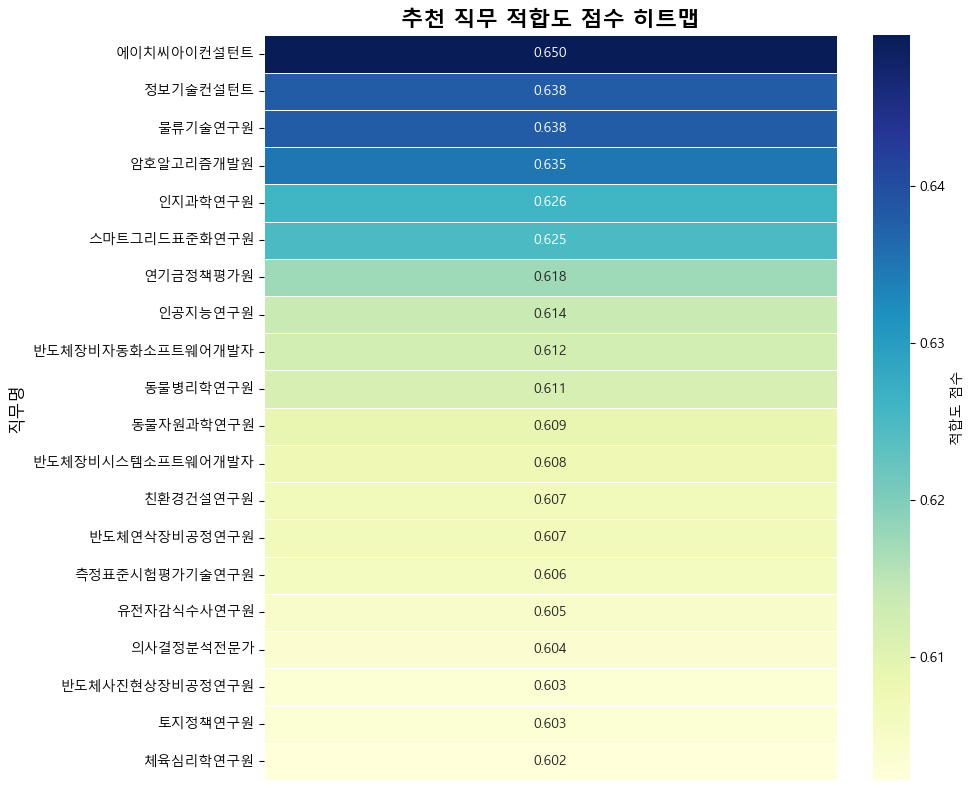

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (Windows: 맑은 고딕, Mac: AppleGothic, Linux: NanumGothic)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux

# 유니코드 마이너스 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# 적합도 점수 히트맵 시각화 함수
def visualize_recommendations_heatmap(recommended_jobs):
    """추천된 직무 정보를 적합도 점수 기준으로 히트맵으로 시각화"""
    plt.figure(figsize=(10, 8))

    # 필요한 컬럼만 추출하여 인덱스 설정
    heatmap_data = recommended_jobs[['직무명', 'total_score']].set_index('직무명')
    heatmap_data = heatmap_data.rename(columns={'total_score': '적합도 점수'})

    # 히트맵 그리기
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".3f",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar_kws={'label': '적합도 점수'}
    )
    plt.title("추천 직무 적합도 점수 히트맵", fontsize=16, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("직무명", fontsize=12)
    plt.xticks([])
    plt.tight_layout()
    plt.show()

# 히트맵 시각화 함수 호출
visualize_recommendations_heatmap(top_n_jobs)


## 경력이 없는 '사회초년생' 알고리즘 코드

### '사회초년생' 예시 데이터

In [51]:
# 개인 정보
personal_info = {
    "name": "Soonjae",
    "age": 25,
    "date_of_birth": "1999-05-21",
    "gender": "남성"
}

# 학력
education = {
    "high_school": {
        "school_name": "서울고등학교",
        "graduation_year": 2017
    },
    "university": {
        "school_name": "동국대학교",
        "department": "통계학과",
        "entry_year": 2020,
        "graduation_year": 2024
    }
}

# 언어 능력 (어학 및 어학 점수)
language_proficiency = {
    "languages": [
        {"language": "영어", "level": "상"},
    ],
    "test_scores": [
        {"test": "TOEIC", "score": 750, "test_date": "2021-08-21"},
        {"test": "OPIc", "score": "IH", "date": "2022-09-12"}
    ]
}

# 보유한 자격증
certifications = [
    {"name": "정보처리기사", "date_obtained": "2022-03-15"},
    {"name": "데이터 분석 전문가", "date_obtained": "2022-05-12"}
]

# 개인 활동
personal_activities = {
    "projects": [
        {
            "name": "소매업 매출 데이터 분석 및 시각화",
            "skills": ["Python", "Pandas", "Matplotlib", "Tableau"],
            "subject": "소매업 데이터 분석",
            "description": (
                "소매업 매출 데이터를 수집 및 전처리, Pandas와 Matplotlib를 활용, 주요 트렌드를 분석."
                " Tableau를 이용해 대시보드를 설계, 시각적으로 표현."
            ),
            "role": "데이터 전처리 및 시각화 설계, 대시보드 제작"
        },
        {
            "name": "머신러닝을 활용한 고객 이탈 예측 모델 개발",
            "skills": ["Python", "Scikit-learn", "Logistic Regression", "XGBoost"],
            "subject": "고객 이탈 예측 시스템",
            "description": (
                "고객 데이터를 분석하여 주요 이탈 요인을 탐색, Scikit-learn과 XGBoost를 활용, 예측 모델 개발."
                " 모델 성능 평가를 위해 ROC-AUC와 F1 점수를 분석, 최적의 하이퍼파라미터를 튜닝."
            ),
            "role": "데이터 분석 및 모델 개발, 성능 평가 및 보고서 작성"
        }
    ],
    "competitions": [
    ]
}


# 사용 가능한 툴
tools = ["Git", "Excel", "Python", "C++", "TensorFlow", "Keras"]

# 수상 경력
awards = []

# 실무 경험
work_experience = []

# 연구 경험
research_experience = []

# 최종 데이터 합침
data = {
    "personal_info": personal_info,
    "education": education,
    "language_proficiency": language_proficiency,
    "certifications": certifications,
    "personal_activities": personal_activities,
    "tools": tools,
    "awards": awards,
    "work_experience": work_experience,
    "research_experience": research_experience
}


### 직무추천 알고리즘

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from sentence_transformers import SentenceTransformer, util


## 직무 데이터
job_data_updated = pd.read_csv('../데이터/직업정보크롤링_전처리완료.csv')

## 이력서와 직무 간 유사도 계산

## (1) 학력 ##
    # [이력서 학력 - 직무 데이터 학력]을 숫자로 매핑
    # 숫자로 매핑하는 이유: 사용자의 학력에서 +-1 수준만 추천하기 위함
education_levels = {
    "초졸 이하": 1,
    "중졸": 2,
    "고졸": 3,
    "전문대졸": 4,
    "대졸": 5,
    "대학원 이상": 6
}

    # 학력 매핑 함수
def map_education_level(education_data):
    if "graduate_school" in education_data and education_data['graduate_school']['department']:
        return education_levels["대학원 이상"]
    elif "university" in education_data and education_data['university']['department']:
        return education_levels["대졸"]
    elif "high_school" in education_data:
        return education_levels["고졸"]
    else:
        return education_levels["중졸"]

    # 학력 수준 추출
resume_education_level = map_education_level(data['education'])
job_data_updated['권장 교육수준 점수'] = job_data_updated['권장 교육수준'].map(education_levels)

    # 사용자 학력의 +-1 수준만 추천
def within_one_level(resume_level, job_level):
    return abs(resume_level - job_level) <= 1

job_data_updated = job_data_updated[job_data_updated['권장 교육수준 점수'].apply(
    lambda job_level: within_one_level(resume_education_level, job_level)
)]

    # 직무 학력과 일치 정도에 따라 점수 차등 부여
def education_score(resume_level, job_level):
    if resume_level == job_level:
        return 1.0
    elif resume_level > job_level:
        return 0.6
    else:
        return max(0, (resume_level / job_level) * 0.3)

job_data_updated['education_score'] = job_data_updated['권장 교육수준 점수'].apply(
    lambda job_level: education_score(resume_education_level, job_level)
)

## (2) [이력-직무설명] 간의 유사도 ##

#     # Work Experience 텍스트 추출
# work_experience_text = " ".join([
#     f"{exp['company_name']} {exp['industry']} {exp['department']} {exp['position']} {exp['main_tasks']} {exp['achievements']}"
#     for exp in data['work_experience']
# ])

#     # Internships 텍스트 추출
# internships_text = " ".join([
#     f"{intern['company_name']} {intern['industry']} {intern['position']} {intern['role']}"
#     for intern in data['internships']
# ])

    # Projects 텍스트 추출
projects_text = " ".join([
    f"{proj['name']} {' '.join(proj['skills'])} {proj['subject']} {proj['description']} {proj['role']}"
    for proj in data['personal_activities']['projects']
])

#     # Competitions 텍스트 추출
# competitions_text = " ".join([
#     f"{comp['name']} {comp['subject']} {' '.join(comp['skills'])} {comp['description']} {comp['role']}"
#     for comp in data['personal_activities']['competitions']
# ])

#     # Awards 텍스트 추출
# awards_text = " ".join([
#     f"{award['award_name']} {award['institution']}"
#     for award in data['awards']
# ])

#     # Research Experience 텍스트 추출
# research_experience_text = " ".join([
#     f"{res['subject']} {res['main_results']} {res['contribution']}"
#     for res in data['research_experience']])

    # Skill, langage(중 or 상) 텍스트 추출
resume_skills = ", ".join(data['tools'])
resume_languages = ", ".join(
    [lang['language'] for lang in data['language_proficiency']['languages'] if lang['level'] in ["중", "상"]]
)

    # 전체 텍스트 결합
resume_full_text = " ".join([
    projects_text,
    resume_skills, resume_languages
])

    # 직무명, 관련직업, 유사명칭 포함하여 결합
job_descriptions = (
    job_data_updated['직무명'].fillna('') + " " +
    job_data_updated['관련직업'].fillna('') + " " +
    job_data_updated['유사명칭'].fillna('') + " " +
    job_data_updated['직무개요_cleaned'].fillna('') + " " +
    job_data_updated['수행직무_cleaned'].fillna('')
)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
job_tfidf = vectorizer.fit_transform(job_descriptions)

    # 이력서 텍스트 데이터
resume_vector = vectorizer.transform([resume_full_text])

    # 코사인 유사도 계산 (TF-IDF)
tfidf_similarity_scores = cosine_similarity(resume_vector, job_tfidf)[0]

    # Sentence-BERT 모델을 사용하여 유사도 계산
bert_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
resume_embedding = bert_model.encode(resume_full_text, convert_to_tensor=True)
job_embeddings = bert_model.encode(job_descriptions.tolist(), convert_to_tensor=True)

bert_similarity_scores = util.pytorch_cos_sim(resume_embedding, job_embeddings).squeeze().cpu().numpy()


## (3) 자격증 ##
    # 자격증 매칭 점수 계산
resume_certifications = [cert['name'] for cert in data['certifications']]
job_data_updated['cert_match'] = job_data_updated['자격/면허'].apply(
    lambda x: 1.0 if pd.isna(x) else sum(cert in resume_certifications for cert in str(x).split(','))
)


# ## (4) 경력 기간 ##

#     # 경력 연수 계산
# def calculate_experience_years(duration):
#     match = re.match(r'(\d{4})-(\d{2}) ~ (\d{4})-(\d{2})', duration)
#     if match:
#         start_year = int(match.group(1))
#         end_year = int(match.group(3))
#         return end_year - start_year
#     return 0

# resume_experience_years = sum(calculate_experience_years(exp['duration']) for exp in data['work_experience'])
    
#     # 권장 숙련기간_최소 문자열에서 개월 수 추출
# def parse_experience_to_months(experience_str):
#     if pd.isna(experience_str):
#         return 0
#     match_years = re.search(r'(\d+)년', experience_str)
#     match_months = re.search(r'(\d+)개월', experience_str)

#     years = int(match_years.group(1)) * 12 if match_years else 0
#     months = int(match_months.group(1)) if match_months else 0

#     return years + months

# job_data_updated['권장 숙련기간_최소_개월'] = job_data_updated['권장 숙련기간_최소'].apply(parse_experience_to_months)
# resume_experience_months = resume_experience_years * 12  # 이력서 경력을 개월로 변환

#     # 경력 점수 계산 (차이를 기반으로 점수화)
# def experience_difference_score(resume_months, required_months):
#     if required_months == 0:
#         return 1  # 권장 숙련기간이 없는 경우 기본적으로 높은 점수
#     difference = resume_months - required_months
#     if difference >= 0:
#         return 1  # 경력이 충분하면 최대 점수
#     return max(0, 1 + (difference / required_months))  # 부족한 만큼 점수 감소

# job_data_updated['experience_score'] = job_data_updated['권장 숙련기간_최소_개월'].apply(
#     lambda min_months: experience_difference_score(resume_experience_months, min_months)
# )

## (5) 학과 ##

    # BERT 기반 학과 점수 계산 함수
def calculate_major_similarity(resume_majors, job_descriptions, bert_model):
    # 이력서 학과들(대학 + 대학원) 임베딩
    major_embeddings = bert_model.encode(resume_majors, convert_to_tensor=True)
    # 직무 설명 임베딩
    job_embeddings = bert_model.encode(job_descriptions.tolist(), convert_to_tensor=True)
    # 코사인 유사도 계산
    similarity_scores = util.pytorch_cos_sim(major_embeddings, job_embeddings)
    # 학과별 유사도 중 가장 높은 값 사용
    return similarity_scores.max(dim=0).values.cpu().numpy()

    # 이력서 학과 정보 (대학 + 대학원)
resume_univ_major = data['education']['university']['department']
# resume_grad_major = data['education']['graduate_school']['department']
resume_majors = [resume_univ_major]

    # BERT 모델 초기화
bert_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

    # 학과 유사도 점수 계산
job_data_updated['major_score'] = calculate_major_similarity(
    resume_majors, job_descriptions, bert_model
)


## 최종 점수 계산 ##

    # BERT 유사도 점수 추가
job_data_updated['bert_similarity_score'] = bert_similarity_scores
    # TF-IDF 유사도 점수 추가
job_data_updated['tfidf_similarity_score'] = tfidf_similarity_scores

job_data_updated['total_score'] = (
    job_data_updated['cert_match'] * 0.20 +  # 자격증 매칭
    # job_data_updated['experience_score'] * 0.10 +  # 경력 점수
    job_data_updated['tfidf_similarity_score'] * 0.20 +  # TF-IDF 기반 텍스트 유사도
    job_data_updated['bert_similarity_score'] * 0.20 +  # BERT 기반 텍스트 유사도
    job_data_updated['education_score'] * 0.30 + # 권장 교육 수준 점수
    job_data_updated['major_score'] * 0.10  # 학과 점수 추가
)

# 상위 10개 직무 추천
top_n_jobs = job_data_updated.nlargest(20, 'total_score')
(top_n_jobs[['직무명', 'total_score', 'bert_similarity_score', 'tfidf_similarity_score', '자격/면허', '관련직업', '권장 교육수준', '직무관련성_자료', '직무관련성_사람', '직무관련성_사물']].rename(
    columns={'total_score': '적합도 점수', 'bert_similarity_score': 'BERT 유사도 점수', 'tfidf_similarity_score': 'TF-IDF 유사도 점수', '자격/면허': '추천 자격증/면허증'}
))

,직무명,적합도 점수,BERT 유사도 점수,TF-IDF 유사도 점수,추천 자격증/면허증,관련직업,권장 교육수준,직무관련성_자료,직무관련성_사람,직무관련성_사물
2554,선물옵션시장분석가,0.666409,0.571304,0.054313,NaN,NaN,대졸,분석,말하기-신호,관련없음
776,그로스해커,0.664062,0.587972,0.022385,NaN,"그로스매니저, 퍼포먼스마케터",대졸,조정,협의,관련없음
5569,통계자료전산처리원,0.662017,0.541466,0.000000,NaN,NaN,대졸,분석,관련없음,관련없음
2211,부동산정보분석사,0.660530,0.549008,0.035656,NaN,NaN,대졸,수집,말하기-신호,관련없음
3042,신용카드고객데이터분석원,0.654730,0.570929,0.049141,NaN,NaN,대졸,분석,교육,관련없음
5568,통계사무원,0.654586,0.493671,0.001506,NaN,"통계자료집계사무원, 통계조사사무원, 인구조사원, 통계기획사무원",대졸,수집,관련없음,관련없음
3786,유전체분석사,0.649288,0.533034,0.014497,NaN,NaN,대졸,분석,말하기-신호,정밀작업
2899,스포츠애널리스트,0.647327,0.478999,0.025990,NaN,"경기분석관, 전력분석관",대졸,분석,협의,관련없음
4771,주식시황분석원,0.647281,0.451335,0.017025,NaN,NaN,대졸,분석,말하기-신호,관련없음
5576,통신고객정보분석원,0.647000,0.472225,0.023124,NaN,NaN,대졸,분석,말하기-신호,관련없음


### 적합도 점수 시각화

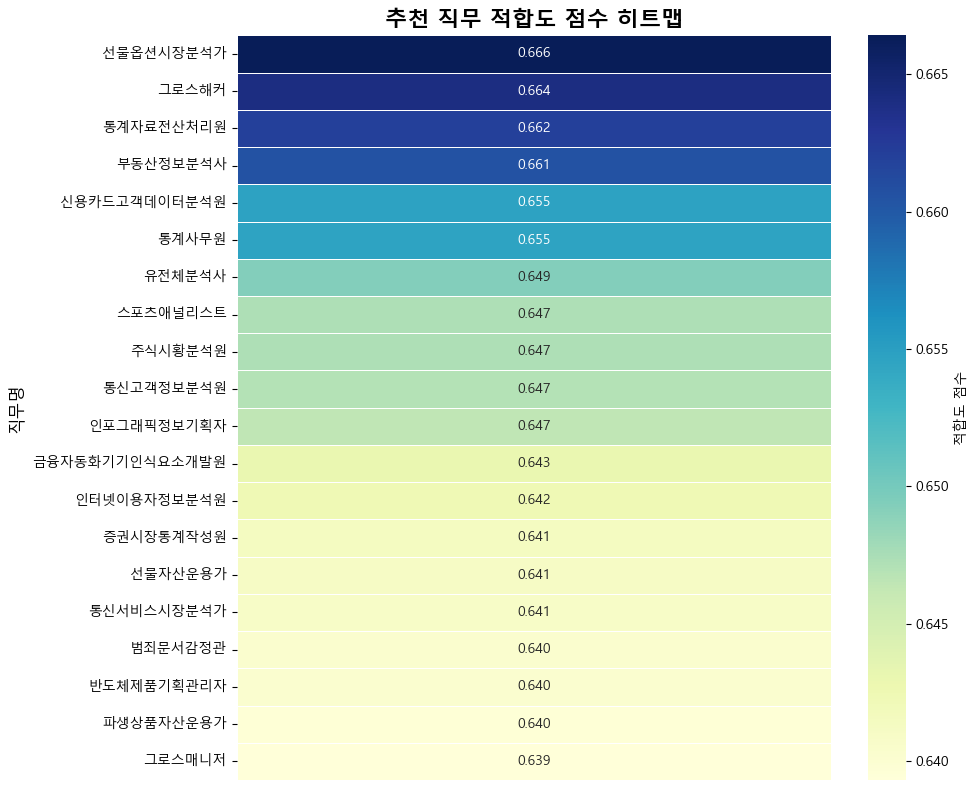

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (Windows: 맑은 고딕, Mac: AppleGothic, Linux: NanumGothic)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux

# 유니코드 마이너스 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# 적합도 점수 히트맵 시각화 함수
def visualize_recommendations_heatmap(recommended_jobs):
    """추천된 직무 정보를 적합도 점수 기준으로 히트맵으로 시각화"""
    plt.figure(figsize=(10, 8))

    # 필요한 컬럼만 추출하여 인덱스 설정
    heatmap_data = recommended_jobs[['직무명', 'total_score']].set_index('직무명')
    heatmap_data = heatmap_data.rename(columns={'total_score': '적합도 점수'})

    # 히트맵 그리기
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".3f",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar_kws={'label': '적합도 점수'}
    )
    plt.title("추천 직무 적합도 점수 히트맵", fontsize=16, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("직무명", fontsize=12)
    plt.xticks([])
    plt.tight_layout()
    plt.show()

# 히트맵 시각화 함수 호출
visualize_recommendations_heatmap(top_n_jobs)


## 각 케이스별 평가지표 계산

### 이직 희망자

In [54]:
import numpy as np

# NDCG 계산 함수
def calculate_ndcg(relevance_scores, k):
    """
    NDCG 계산 함수
    :param relevance_scores: 추천된 직무들의 relevance 점수 리스트 (순서 중요)
    :param k: Top-k 추천에 대해 평가
    :return: NDCG 값
    """
    relevance_scores = np.array(relevance_scores[:k])  # Top-k만 사용
    if relevance_scores.size == 0:
        return 0.0

    # DCG 계산
    dcg = np.sum(relevance_scores / np.log2(np.arange(2, relevance_scores.size + 2)))

    # IDCG 계산 (relevance 점수를 내림차순 정렬)
    ideal_relevance_scores = np.sort(relevance_scores)[::-1]
    idcg = np.sum(ideal_relevance_scores / np.log2(np.arange(2, ideal_relevance_scores.size + 2)))

    # NDCG 계산
    ndcg = dcg / idcg if idcg > 0 else 0.0
    return ndcg

# 사용 예시
# 예를 들어 추천 결과에 대한 실제 relevance 점수
relevance_scores = [3, 2, 3, 0, 1, 2]  # 사용자가 평가한 직무 적합성 점수
k = 5  # Top-5에 대해 평가

ndcg_score = calculate_ndcg(relevance_scores, k)
print(f"Top-{k} NDCG: {ndcg_score:.4f}")

Top-5 NDCG: 0.9724


In [58]:
import numpy as np

def calculate_ndcg_with_relevance(relevance_scores, k=10):
    """
    사용자 제공 적합성 점수를 기반으로 NDCG@k 계산
    :param relevance_scores: 추천 리스트에 대한 사용자 제공 적합성 점수 리스트
    :param k: 평가할 상위 추천 항목 수 (기본값: 10)
    :return: NDCG 점수
    """
    # relevance_scores가 k보다 짧으면 부족한 부분을 0으로 채움
    if len(relevance_scores) < k:
        relevance_scores = np.pad(relevance_scores, (0, k - len(relevance_scores)), 'constant')

    # 상위 k개의 적합성 점수 선택
    relevance_scores = np.array(relevance_scores[:k])

    # DCG (Discounted Cumulative Gain) 계산
    dcg = np.sum(relevance_scores / np.log2(np.arange(2, len(relevance_scores) + 2)))

    # IDCG (Ideal DCG) 계산
    sorted_relevance_scores = np.sort(relevance_scores)[::-1]  # 적합성 점수를 내림차순 정렬
    idcg = np.sum(sorted_relevance_scores / np.log2(np.arange(2, len(sorted_relevance_scores) + 2)))

    # NDCG 계산
    ndcg = dcg / idcg if idcg > 0 else 0

    print(f"NDCG@{k}: {ndcg:.4f}")
    return ndcg

# 상위 10개 채용공고에 대한 적합성 점수
relevance_scores = [2, 2, 3, 5, 7, 5, 3, 10, 9, 3]  # 위에서 부여한 점수
k = 10

# NDCG 계산
ndcg_score = calculate_ndcg_with_relevance(relevance_scores, k)

NDCG@10: 0.6968
